In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('wine.csv')

In [44]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [45]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

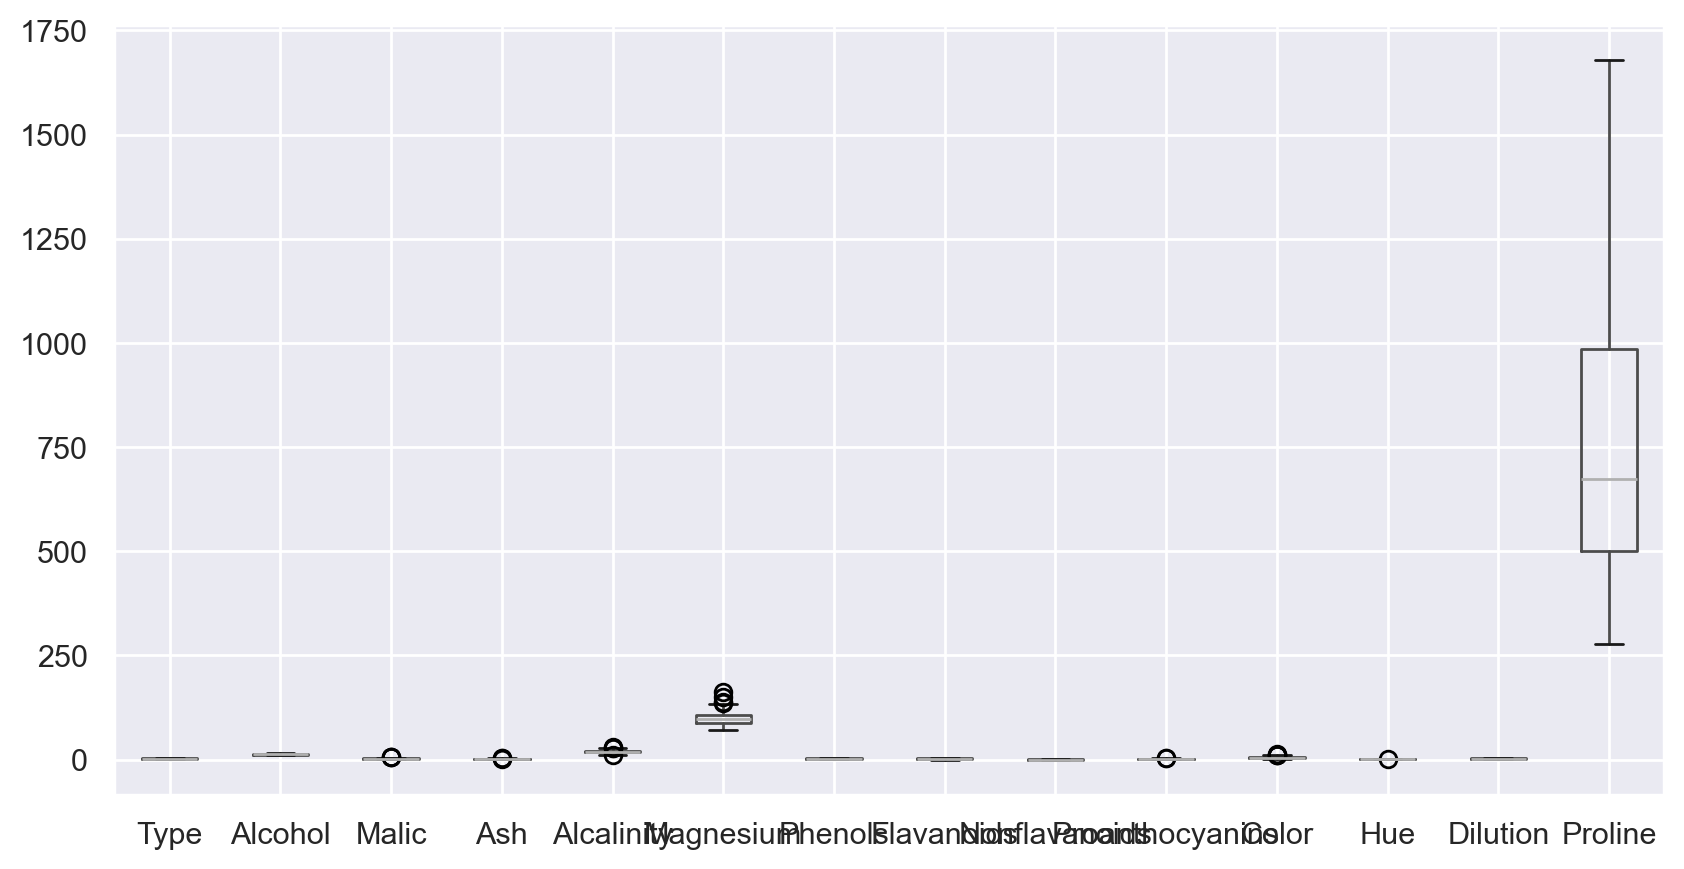

In [46]:
df.boxplot()

<Axes: xlabel='Type', ylabel='Alcohol'>

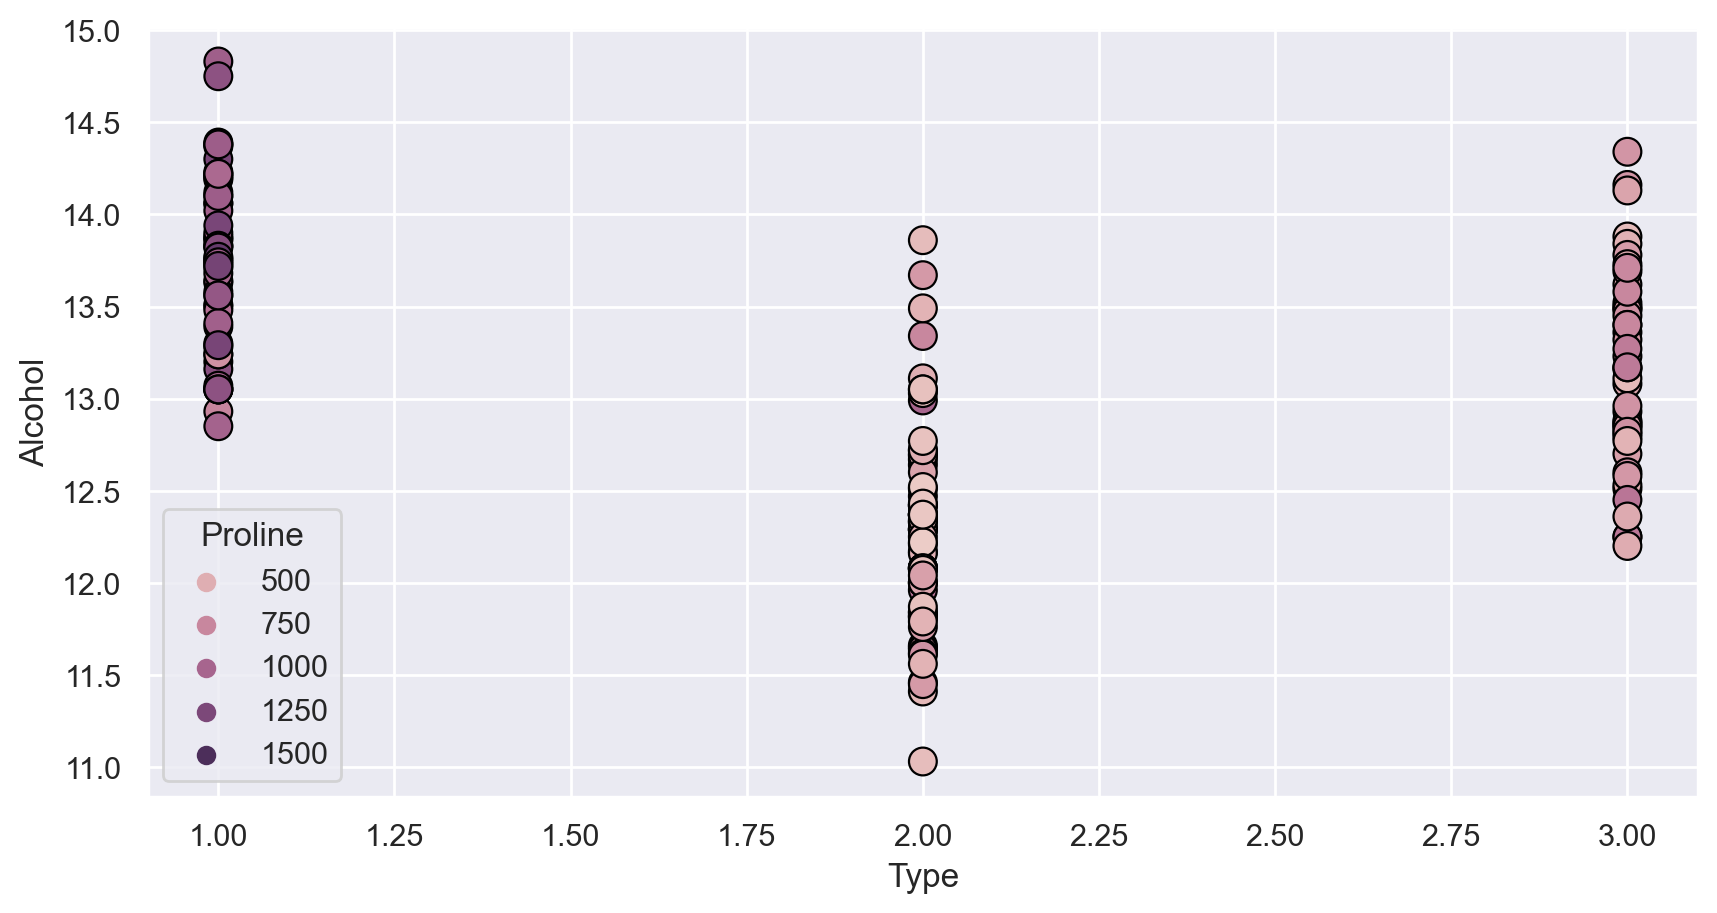

In [47]:
sns.scatterplot(x = df['Type'], y = df['Alcohol'], hue=df['Proline'], s = 100, edgecolor = 'black')


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA()
pcs = pca.fit_transform(x)

In [52]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


Text(0.5, 1.0, 'Scree Plot')

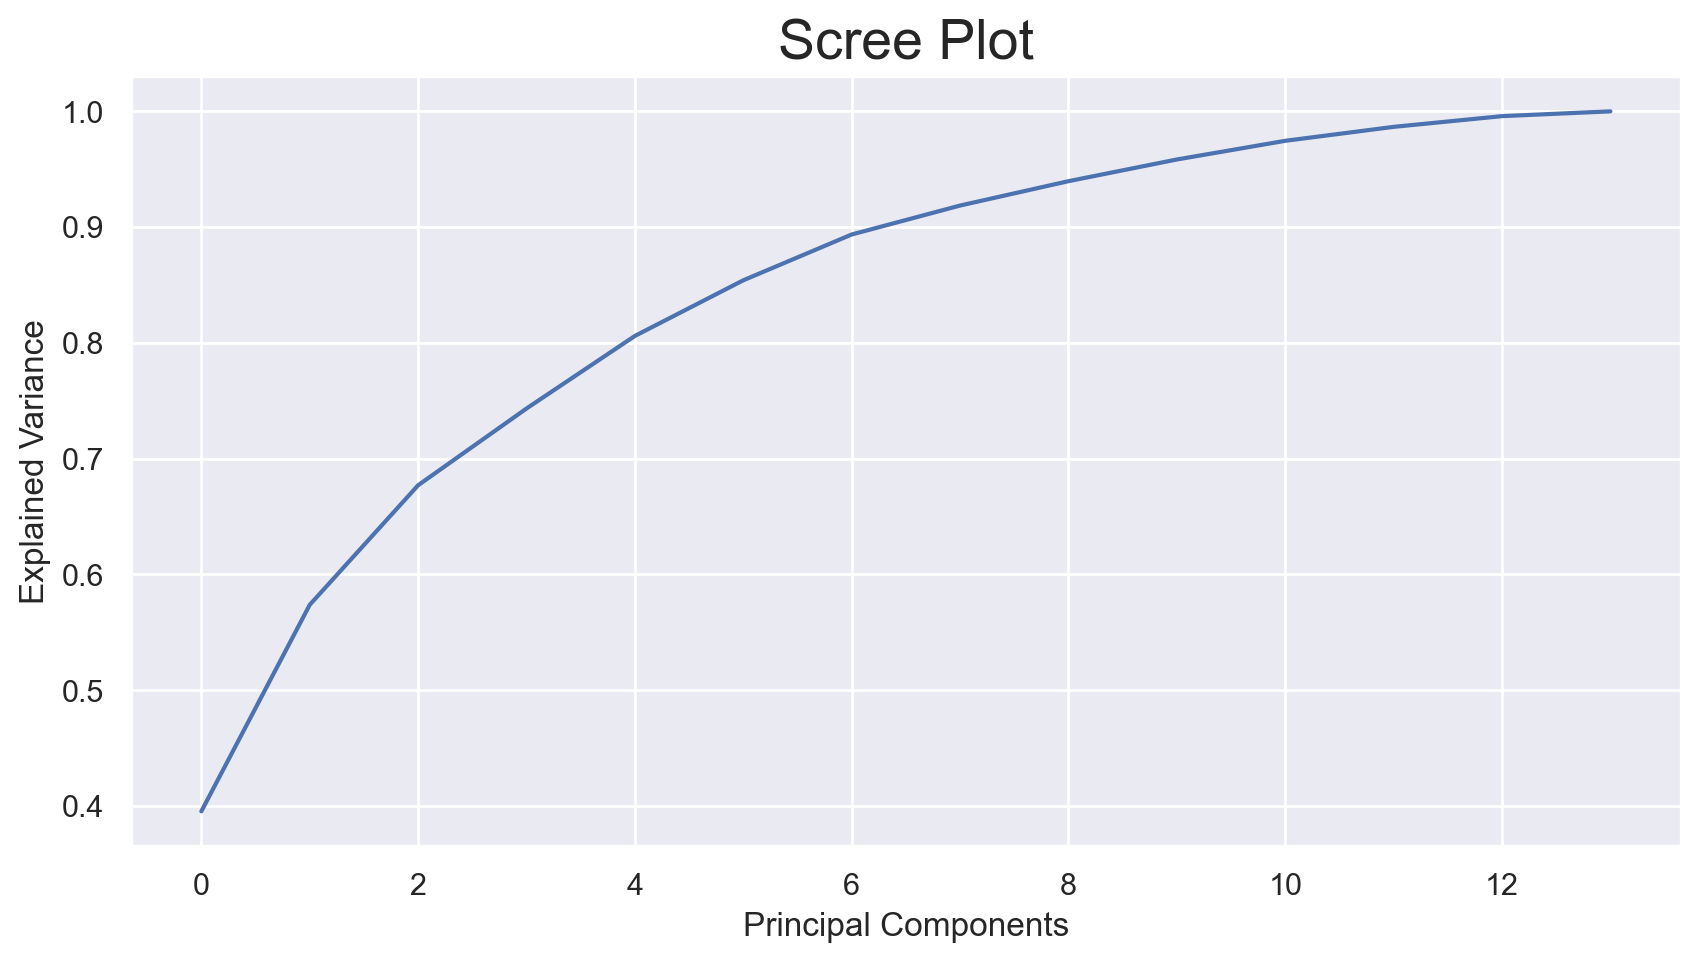

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [54]:
pca = PCA(n_components=6)
pcs = pca.fit_transform(x)
pcs

array([[-3.5229339 , -1.45309844, -0.16479549, -0.01327282,  0.73734536,
        -0.30071618],
       [-2.52885806,  0.33001925, -2.02670665, -0.41714436, -0.28321373,
        -0.88430941],
       [-2.78502898, -1.03693595,  0.9832377 ,  0.66423241, -0.38756497,
         0.46884161],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304,  0.60775846,  1.12813634,
         0.00529036],
       [ 2.75522166, -2.29378408, -0.55047368, -0.39157042,  1.06708304,
         1.01256231],
       [ 3.49633565, -2.76060799,  1.01315115,  0.3496303 , -1.00513627,
         0.37722337]])

In [55]:
data = pd.DataFrame(pcs,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data

,PC1,PC2,PC3,PC4,PC5,PC6
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762
...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562


In [56]:
from sklearn.cluster import KMeans

In [57]:
km = KMeans()
yp = km.fit_predict(data)
yp

array([3, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 6, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 7, 7, 7, 7, 2, 7, 2,
       2, 2, 7, 4, 7, 6, 7, 4, 2, 7, 2, 7, 4, 6, 2, 2, 6, 5, 2, 2, 7, 6,
       7, 7, 7, 7, 7, 2, 2, 4, 4, 2, 2, 2, 2, 7, 2, 2, 2, 7, 2, 7, 2, 6,
       2, 2, 6, 6, 6, 6, 2, 2, 7, 2, 2, 6, 6, 2, 2, 2, 2, 6, 6, 7, 5, 5,
       5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 0,
       0, 0])

In [58]:
len(yp)

178

In [59]:
km.cluster_centers_

array([[ 2.91224380e+00, -2.07388181e+00,  5.89985874e-02,
         3.85616945e-01,  2.77906059e-01,  7.78189644e-01],
       [-2.22746103e+00, -4.49191630e-01, -5.42085142e-01,
        -6.14178955e-03, -3.32117334e-01, -5.88694191e-01],
       [-5.23200912e-01,  1.91331184e+00, -1.11651588e-01,
         8.79995748e-01,  4.36360319e-02,  2.03683795e-01],
       [-2.97554872e+00, -1.49605087e+00,  8.57435704e-02,
        -3.35112832e-01, -1.64122610e-01,  1.23955212e-01],
       [-1.36819318e+00,  4.13026684e-01,  6.11958038e-01,
        -1.50158716e-01,  3.43824969e+00,  1.05271850e-01],
       [ 3.18534972e+00, -5.96934212e-01, -3.27291282e-01,
        -9.00419903e-02, -6.30537440e-02, -4.91866451e-01],
       [-2.12537028e-03,  1.40452704e+00,  2.26657098e+00,
        -3.01426463e-01, -2.56411640e-01,  2.13848604e-01],
       [ 1.21889409e+00,  1.59270888e+00, -4.77217495e-01,
        -8.21797373e-01, -2.13491830e-01,  2.64274873e-02]])

In [60]:
km.inertia_

620.4163861234076

In [61]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)

In [62]:
wcss

[2128.3989008251006,
 1364.5928736574122,
 924.2016908433723,
 825.6569159607725,
 757.5640390042956,
 704.3122819465191,
 649.9787388176717,
 599.9152541432146,
 561.9719041487422,
 535.5380615296798]

Text(0.5, 1.0, 'Elbow Graph')

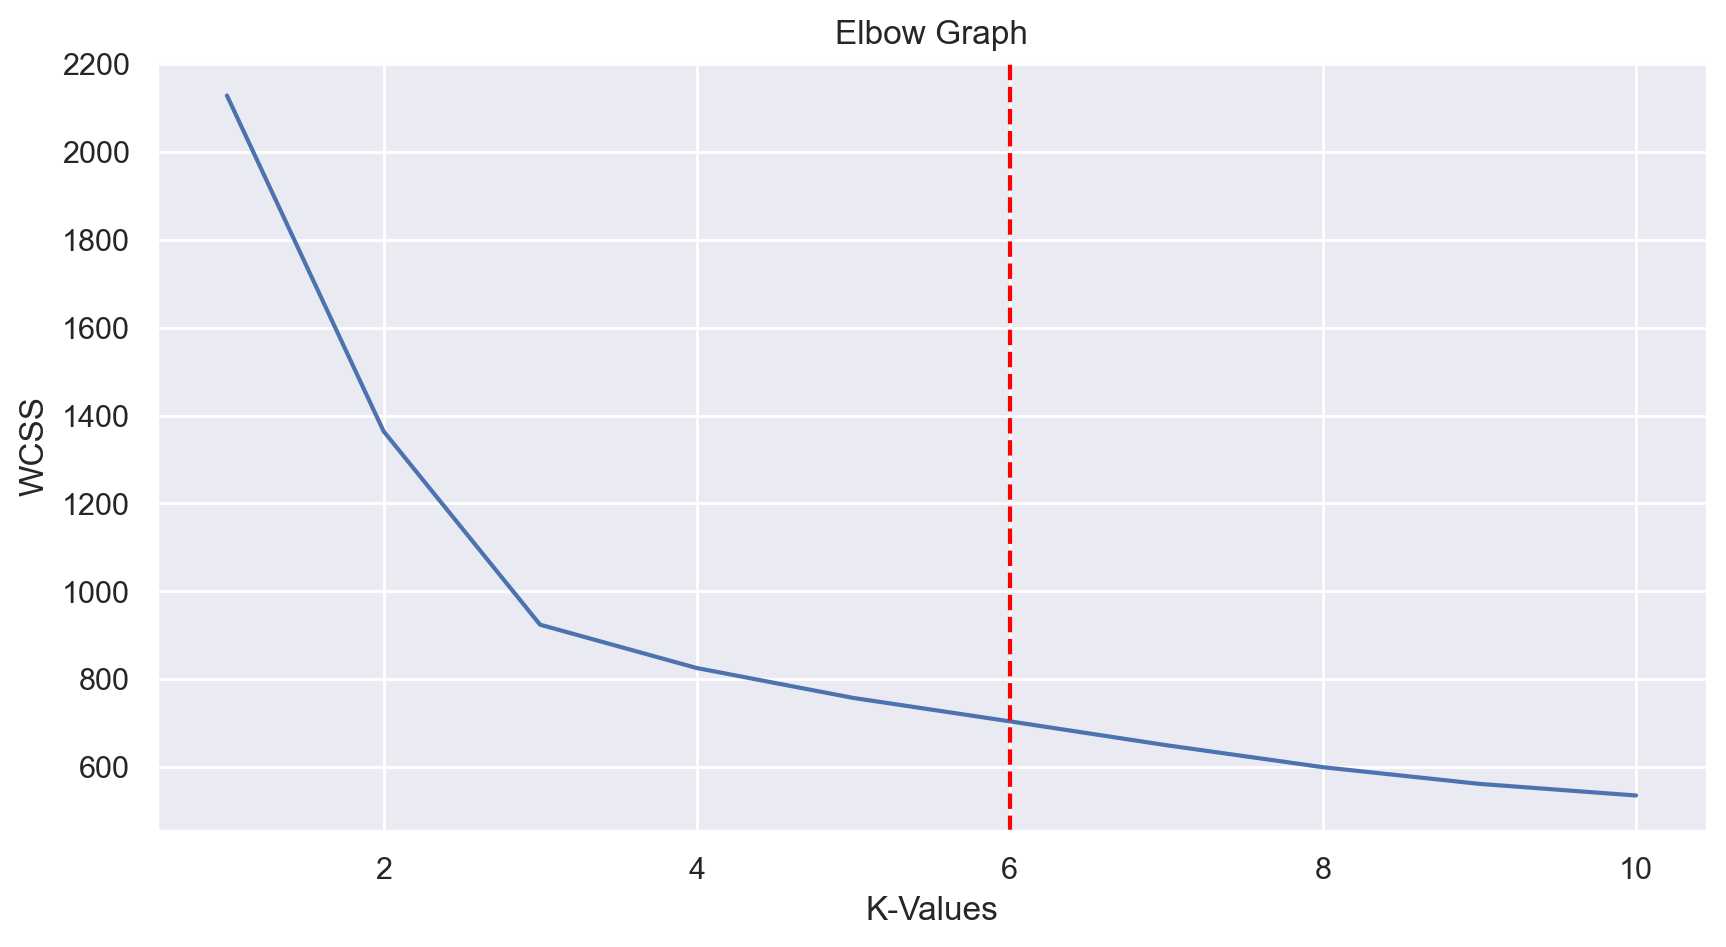

In [63]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 6, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [64]:
km = KMeans(n_clusters=6)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 4, 4, 3, 4,
       4, 4, 0, 4, 3, 2, 3, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 0, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 1, 3, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 3, 4, 2,
       2, 4, 3, 3, 3, 3, 4, 3, 0, 4, 2, 2, 2, 2, 2, 4, 4, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 0, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       5, 5])